In [ ]:
def generate_magic_square(n):
    if n % 2 == 0:
        raise ValueError("Only odd numbers are allowed for magic squares.")

    magic_square = [[0] * n for _ in range(n)]

    row, col = 0, n // 2  # Start position
    magic_square[row][col] = 1  # Place the first number

    for num in range(2, n * n + 1):
        new_row, new_col = (row - 1) % n, (col + 1) % n  # Move up and to the right

        if magic_square[new_row][new_col]:  # If the cell is already filled
            row += 1  # Move down instead
        else:
            row, col = new_row, new_col  # Move to the new cell

        magic_square[row][col] = num  # Place the next number

    return magic_square

def print_magic_square(magic_square):
    n = len(magic_square)
    for row in magic_square:
        print(" ".join(f"{num:2d}" for num in row))
    print("Magic Constant:", n * (n * n + 1) // 2)

if __name__ == "__main__":
    size = int(input("Enter an odd number for the size of the magic square: "))
    try:
        magic_square = generate_magic_square(size)
        print_magic_square(magic_square)
    except ValueError as e:
        print(e)


Enter an odd number for the size of the magic square: 5
17 24  1  8 15
23  5  7 14 16
 4  6 13 20 22
10 12 19 21  3
11 18 25  2  9
Magic Constant: 65


{0: 16, 1: 15, 2: 2, 3: 1, 4: 3, 5: 14, 6: 13, 7: 4, 8: 12, 9: 11, 10: 6, 11: 5, 12: 7, 13: 8, 14: 9, 15: 10}
Solution exists:  {'A': 'red', 'B': 'green', 'C': 'blue', 'D': 'red', 'E': 'green', 'F': 'blue'}


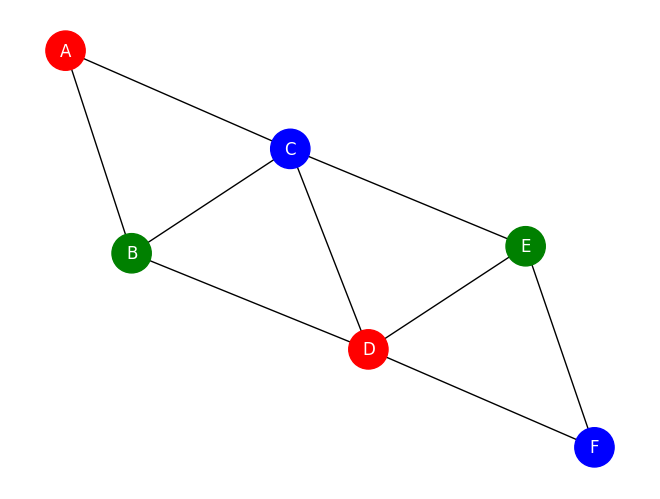

In [ ]:
#!pip install python-constraint
from constraint import *
n = 4
problem = Problem()
problem.addVariables(range(0, n*n), range(1, n*n + 1))
problem.addConstraint(AllDifferentConstraint(), range(0, n*n))
exactSum = (n*((n*n)+1))/2
for row in range(n):
  problem.addConstraint(ExactSumConstraint(exactSum), [row * n + i for i in range(n)])
for column in range(n):
  problem.addConstraint(ExactSumConstraint(exactSum), [column * n + i for i in range(n)])
solutions = problem.getSolution()
print(solutions)
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'),
    ('E', 'F')
])
colors = ['red', 'green', 'blue', 'yellow']
def is_safe(node, color, color_map):
    for neighbor in G.neighbors(node):
        if color_map.get(neighbor) == color:
            return False
    return True
def color_map_func(node, color_map): # Changed function name to color_map_func
    if node == len(G.nodes):
        return True

    for color in colors:
        if is_safe(list(G.nodes)[node], color, color_map):
            color_map[list(G.nodes)[node]] = color
            if color_map_func(node + 1, color_map): # Call the function with the new name
                return True
            color_map[list(G.nodes)[node]] = None
    return False
color_map = {node: None for node in G.nodes}
if color_map_func(0, color_map): # Call the function with the new name
    print("Solution exists: ", color_map)
else:
    print("No solution exists")
color_values = [color_map.get(node) for node in G.nodes]
nx.draw(G, with_labels=True, node_color=color_values, node_size=800, font_color='white')
plt.show()